In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import the Dataset
Dataset on loan outcomes

In [2]:
loandata = pd.read_csv('loan_data.csv')
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [3]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


- There are 12 variables and 381 rows in the dataset
- The response variable is Loan_Status, while the remaining 10 variables are most likely predictors (excluding Loan_ID).
- The are 5 variables identified as int64 and float64. Out of these 5, credit_history is not a numerical data. It should be categorical as it uses 1 or 0 to indicate whether the credit history of the applicants meets requirement. 
- The remaining 7 variables are identified as object and they are most likely categorical. 
- There are several variables that seem to have missing value. (E.g. Loan_Amount_Term and Gender is left blank for some rows)

# Cleaning the Dataset
These are the following items that will be done to clean the dataset:
1. Change the Dtype for credit_history to object 
2. Convert 1 and 0 in credit history to Y or N for easy readability
3. Change the Dtype of ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term to float64 as decimals might occur during any calculations.
4. Remove NA values from the dataset 

## Changing Dtype for Credit_history, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

In [4]:
loandata['Credit_History'] = loandata['Credit_History'].astype('object')

In [5]:
columns_to_convert = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Change data types of multiple columns
loandata[columns_to_convert] = loandata[columns_to_convert].astype('float64')

In [6]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    float64
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    object 
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), object(9)
memory usage: 38.8+ KB


## Remove NA Rows

In [7]:
loandata = loandata.dropna()

In [8]:
desired_loan_ID = 'LP001041'  # Replace 'XYZ123' with the loan ID you want to search for

# Select rows with the specified loan ID
desired_row = loandata.loc[loandata['Loan_ID'] == desired_loan_ID]

print(desired_row)

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


Loan_ID LP001041 have a NA value for "Self_Employed" and "Loan_Amount_Term". The above confirms that the NA rows have been removed successfully. We can then continue cleaning the dataset.

## Convert 1 and 0 in credit history to Y or N for easy readability

In [9]:
loandata.loc[loandata['Credit_History'] == 1.0, 'Credit_History'] = 'Y'
loandata.loc[loandata['Credit_History'] == 0.0, 'Credit_History'] = 'N'

In [10]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,Y,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,Y,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,Y,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,Y,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,Y,Urban,Y


In [11]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    float64
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    object 
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), object(9)
memory usage: 33.7+ KB


- There are a total of 308 rows now
- All numerical datatypes are in float64 and categorical datatypes are in object

In [12]:
loandata.to_csv('cleaned_loan_data.csv', index=False)

## Exploratory Data Analysis


C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


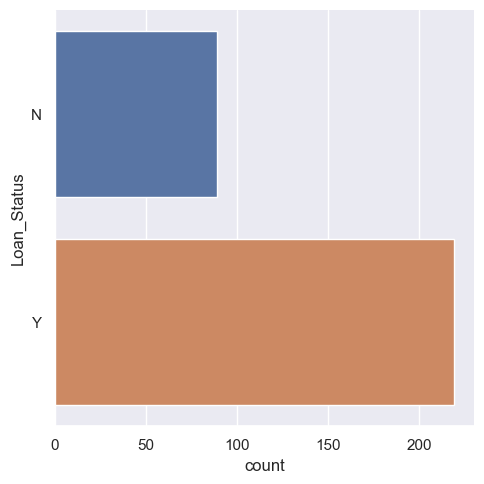

In [13]:
sb.catplot(y = 'Loan_Status', data = loandata, kind = "count")

In [14]:
# Numeric Predictors
loandata[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1278.434805,104.623377,341.181818
std,1462.359612,2520.961308,29.382256,68.246006
min,150.000000,0.000000,9.000000,36.000000
25%,2568.750000,0.000000,89.750000,360.000000
50%,3329.500000,871.500000,110.000000,360.000000
75%,4291.000000,1953.500000,128.000000,360.000000
max,9703.000000,33837.000000,150.000000,480.000000


In [15]:
# Categorical Predictors
loandata[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']].describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,308,308,308,308,308,308,308,308
unique,2,2,4,2,2,2,3,2
top,Male,Yes,0,Graduate,No,Y,Semiurban,Y
freq,245,185,194,229,280,263,123,219


### Note
1. ApplicantIncome and Coapplicantincome is based on income per month
2. LoanAmount is in thousands. E.g 128 represents loan amount if 128000. 
3. Loan_Amount_Term is in months 


## Predictors corresponding to the Credit

<Axes: xlabel='LoanAmount', ylabel='Count'>

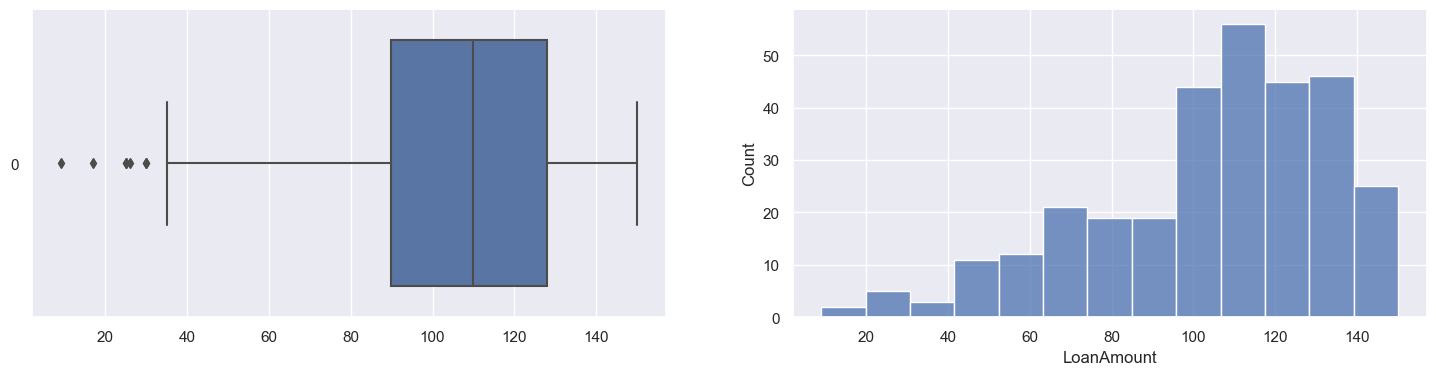

In [16]:
# Loan Amount
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = loandata['LoanAmount'], orient = "h", ax = axes[0])
sb.histplot(data = loandata['LoanAmount'], ax = axes[1])

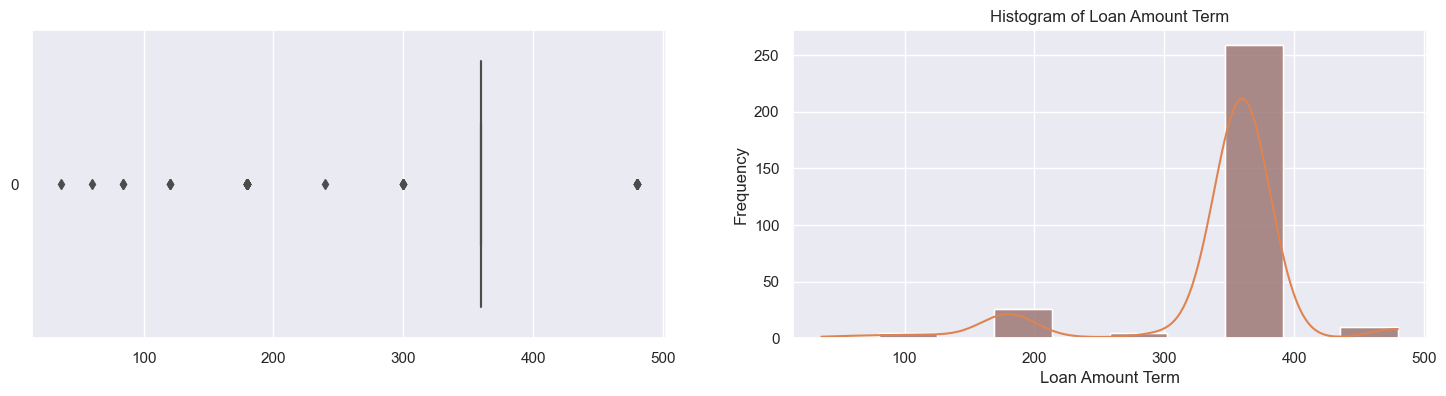

In [17]:
# Duration of the Loan
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = loandata['Loan_Amount_Term'], orient = "h", ax = axes[0])
sb.histplot(data = loandata['Loan_Amount_Term'], ax = axes[1])

sb.histplot(data=loandata, x='Loan_Amount_Term', kde=True)
plt.title('Histogram of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

## Predictors corresponding to the Customer
We will use the following:
1. ApplicantIncome + CoapplicantIncome
2. Credit History
3. Married
4. Dependents
5. Education

In [18]:
# Adding applicant income with coapplicant income
loandata.loc[:, 'TotalIncome'] = loandata['ApplicantIncome'] + loandata['CoapplicantIncome']

In [19]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,Y,Rural,N,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,Y,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,Y,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,Y,Urban,Y,6000.0
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,Y,Urban,Y,3849.0


In [20]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,Y,Rural,N,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,Y,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,Y,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,Y,Urban,Y,6000.0
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,Y,Urban,Y,3849.0


<Axes: xlabel='TotalIncome', ylabel='Count'>

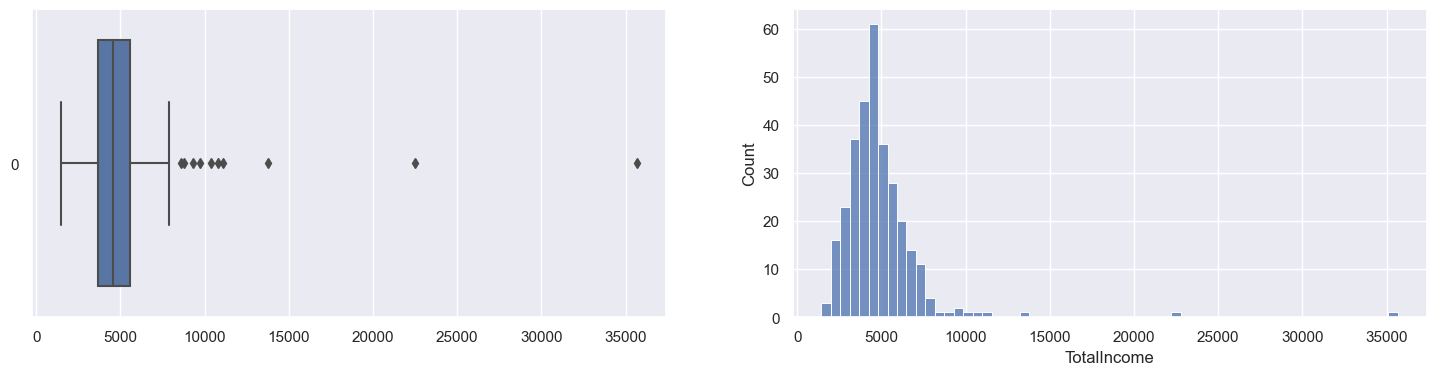

In [21]:
# Combined income of applicants
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = loandata['TotalIncome'], orient = "h", ax = axes[0])
sb.histplot(data = loandata['TotalIncome'], ax = axes[1])

C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


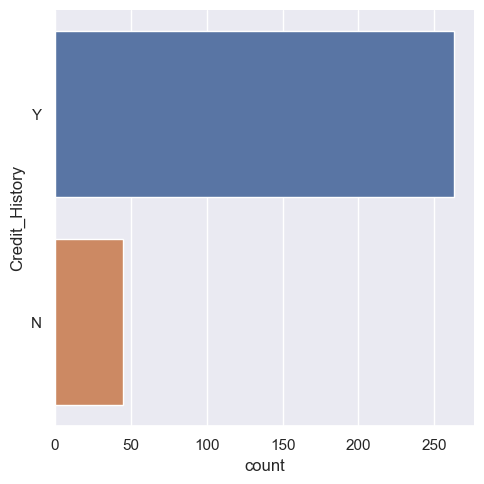

In [22]:
# Credit History of applicants
sb.catplot(y = 'Credit_History', data = loandata, kind = "count")

C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


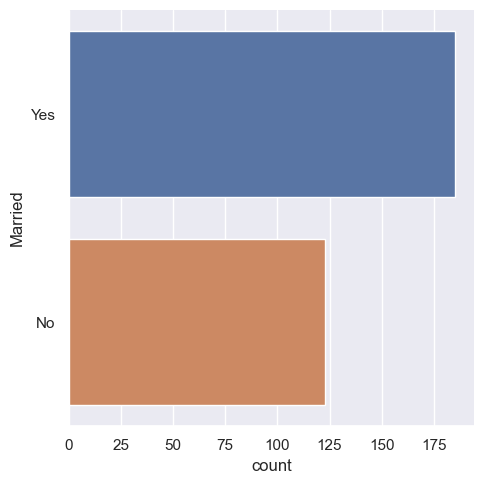

In [23]:
# Marital Status of Applicants
sb.catplot(y = 'Married', data = loandata, kind = "count")

C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


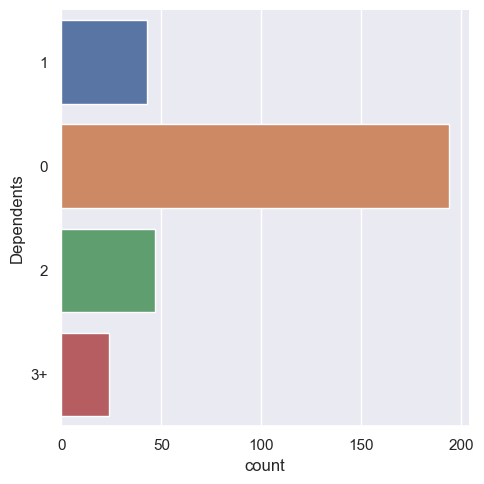

In [24]:
# No. of Dependents
sb.catplot(y = 'Dependents', data = loandata, kind = "count")

C:\Users\wilso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


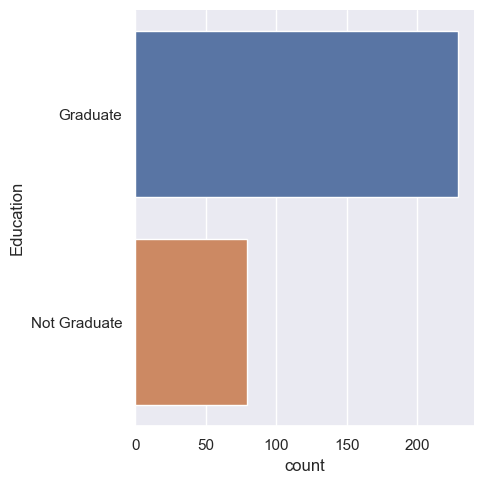

In [25]:
# Education level of applicants
sb.catplot(y = 'Education', data = loandata, kind = "count")

## Relationship with Loan_Status

### Total Income vs Loan Status
From the plot below, it can be seen that total income of applicants and coapplicants does not have a relationship with loan status.

<Axes: xlabel='TotalIncome', ylabel='Loan_Status'>

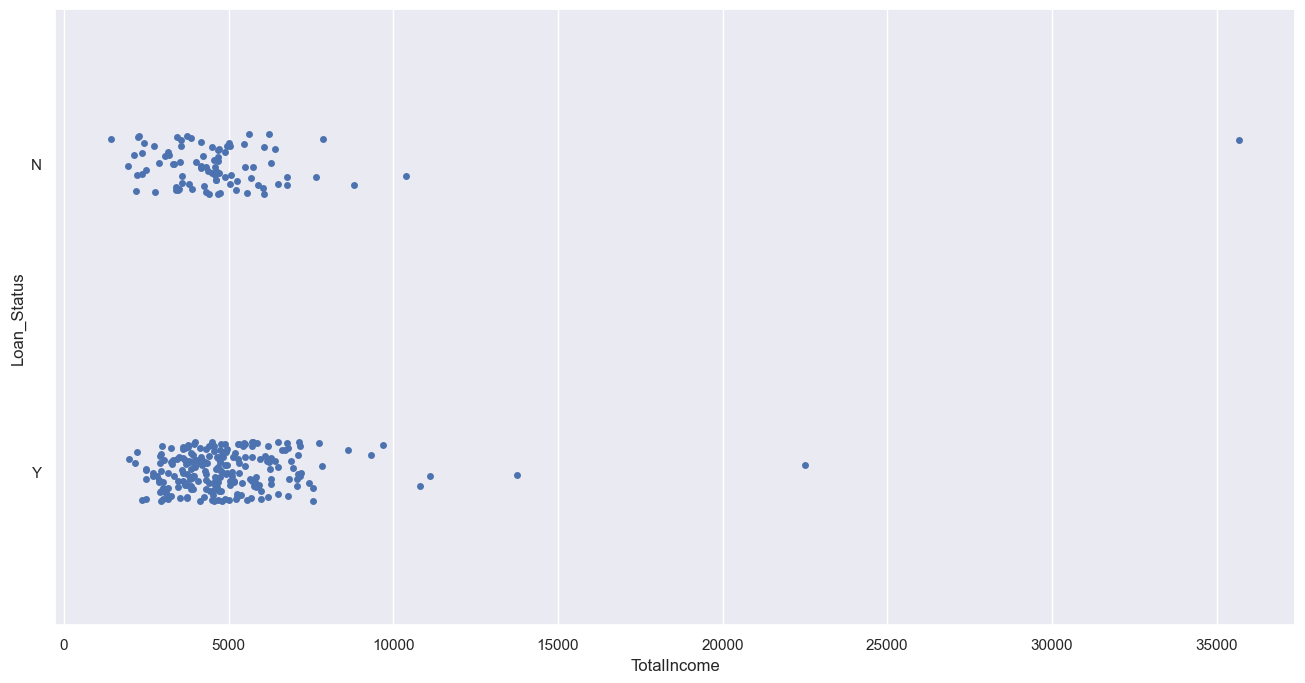

In [26]:
# Rating vs total income
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'TotalIncome', y = 'Loan_Status', data = loandata)



### Loan Amount vs Loan Status
The loan amount also does not seem to have a relationship with loan status.

<Axes: xlabel='LoanAmount', ylabel='Loan_Status'>

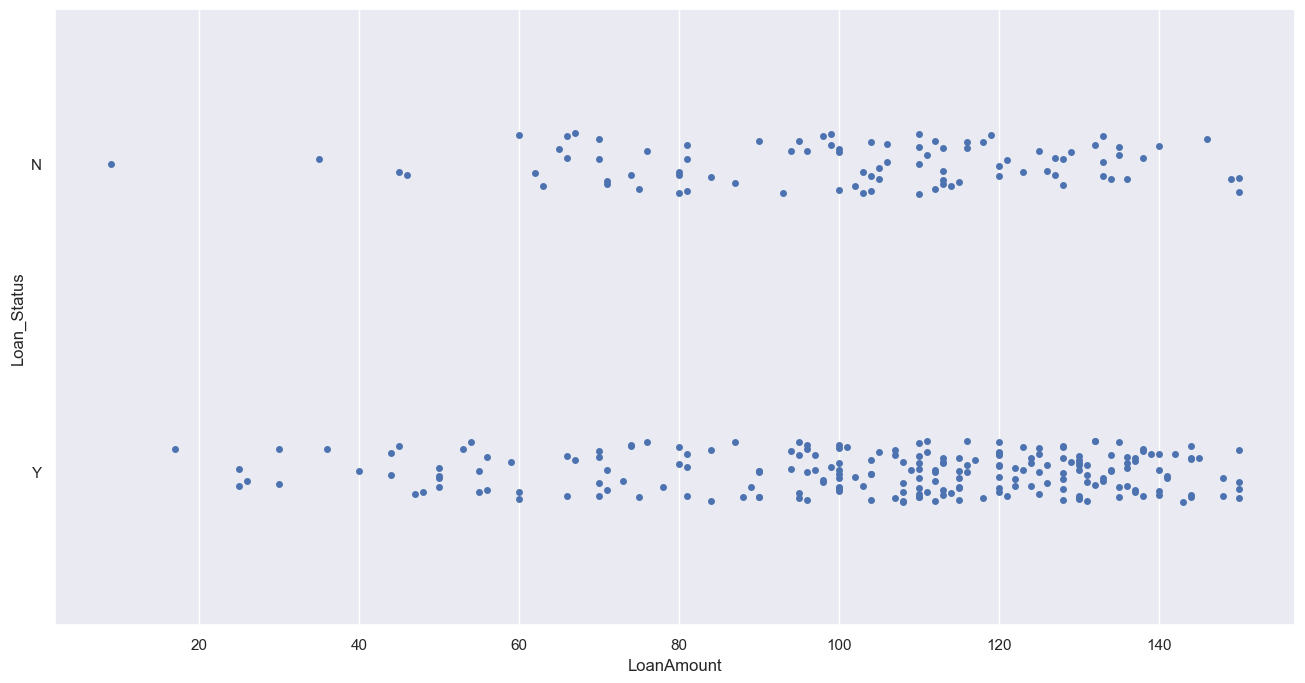

In [27]:
# Loan Amount vs Loan Status
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'LoanAmount', y = 'Loan_Status', data = loandata)

### Credit History vs Loan Status

There are a total of 263 applicants who have credit history that meet the requirements. Of which, 216 of them have their loan aprroved. That is about 82%. 

There are a total of 45 applicants who have credit history that DOES NOT meet the requirements and only 3 of them manage to get the loan approved. That is about 7%. 

This shows that credit history might play an important role in determining whether a loan will be approve.

<Axes: xlabel='Credit_History', ylabel='Loan_Status'>

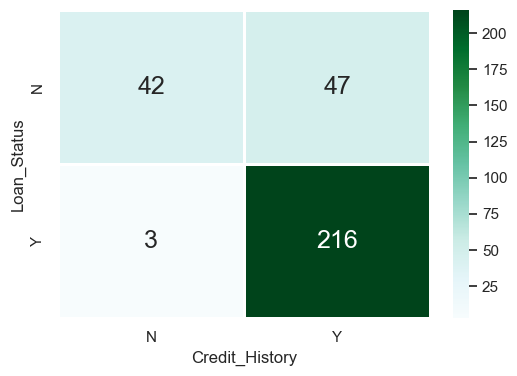

In [28]:
# Credit History vs Loan Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(loandata.groupby(['Loan_Status', 'Credit_History']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Marital Status vs Loan Status
There are 185 married applicants and 123 single applicants.
Out of the 185 married applicants, 140 of them were given the loan. That is about 75%.

Out of 123 single applicants, 79 of them were given the loan. That is about 64%.

<Axes: xlabel='Married', ylabel='Loan_Status'>

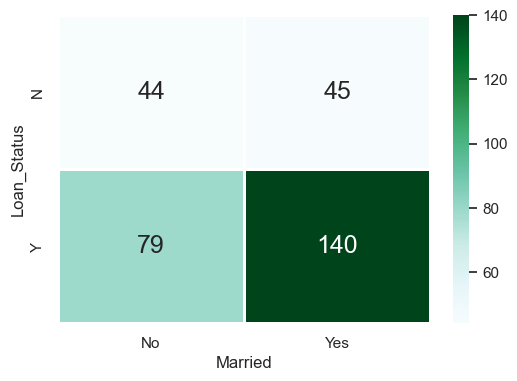

In [29]:
# Marital Status vs Loan Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(loandata.groupby(['Loan_Status', 'Married']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### No. Of Dependents vs Loan Status

<Axes: xlabel='Dependents', ylabel='Loan_Status'>

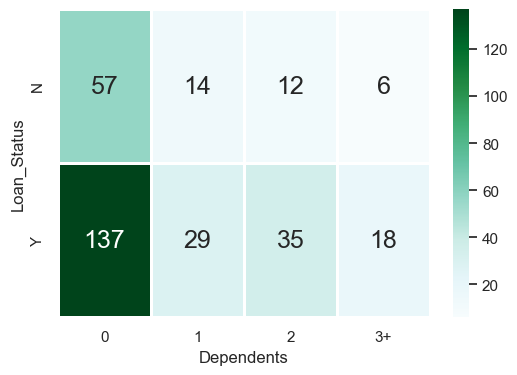

In [30]:
# No. Of Dependents vs Loan Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(loandata.groupby(['Loan_Status', 'Dependents']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Education level vs Loan Status

<Axes: xlabel='Education', ylabel='Loan_Status'>

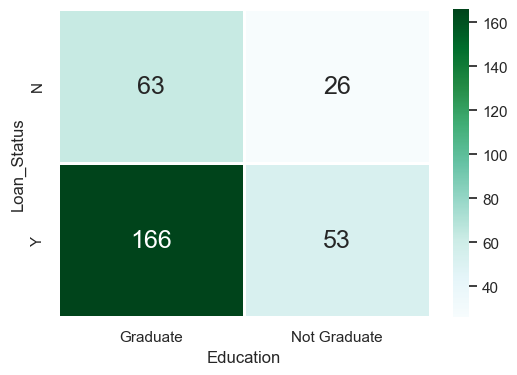

In [31]:
# Education level vs Loan Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(loandata.groupby(['Loan_Status', 'Education']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Property Area vs Loan Status

<Axes: xlabel='Property_Area', ylabel='Loan_Status'>

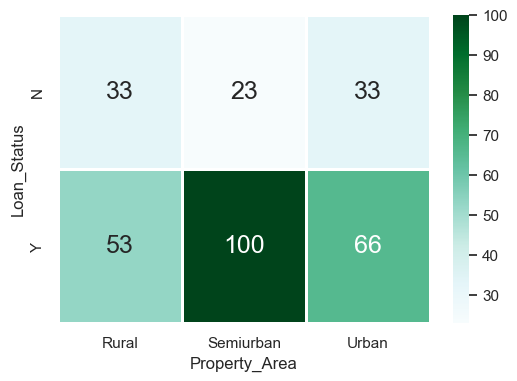

In [32]:
# Property type vs Loan Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(loandata.groupby(['Loan_Status', 'Property_Area']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Gender vs Loan Status

<Axes: xlabel='Gender', ylabel='Loan_Status'>

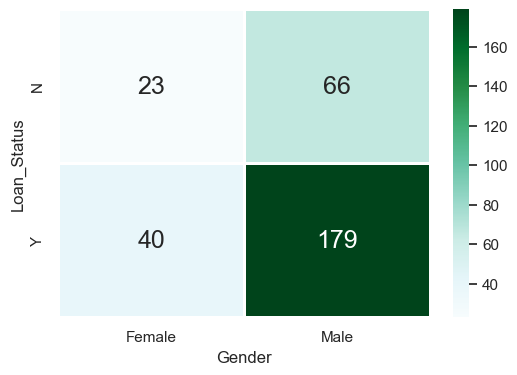

In [50]:
# Gender vs Loan Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(loandata.groupby(['Loan_Status', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Determining the Most Important Variable
We will now start to determine which is the variable that will most likely affect the outcome of the loan status. From the above observations, we have made some assumptions 
- Total income and loan amount have little to no impact on loan status
- Credit history might affect the outcome of loan status 

We will now proceed to verify these assumptions. 


## Total Income, Loan Amount vs Loan Status
Using Point Biserial Correlation

In [33]:
jointdf = pd.DataFrame(loandata[["TotalIncome","LoanAmount","Loan_Status"]])
jointdf.describe()

,TotalIncome,LoanAmount
count,308.000000,308.000000
mean,4877.561429,104.623377
std,2587.872984,29.382256
min,1442.000000,9.000000
25%,3663.750000,89.750000
50%,4583.000000,110.000000
75%,5566.500000,128.000000
max,35673.000000,150.000000


In [34]:
jointdf.loc[loandata['Loan_Status'] == 'Y', 'Loan_Status'] = 1
jointdf.loc[loandata['Loan_Status'] == 'N', 'Loan_Status'] = 0

In [35]:
jointdf.head()

,TotalIncome,LoanAmount,Loan_Status
0,6091.0,128.0,0
1,3000.0,66.0,1
2,4941.0,120.0,1
3,6000.0,141.0,1
4,3849.0,95.0,1


In [37]:
jointdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalIncome  308 non-null    float64
 1   LoanAmount   308 non-null    float64
 2   Loan_Status  308 non-null    object 
dtypes: float64(2), object(1)
memory usage: 17.7+ KB


In [40]:
jointdf['Loan_Status'] = jointdf['Loan_Status'].astype(int)

In [41]:
jointdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalIncome  308 non-null    float64
 1   LoanAmount   308 non-null    float64
 2   Loan_Status  308 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 16.5 KB


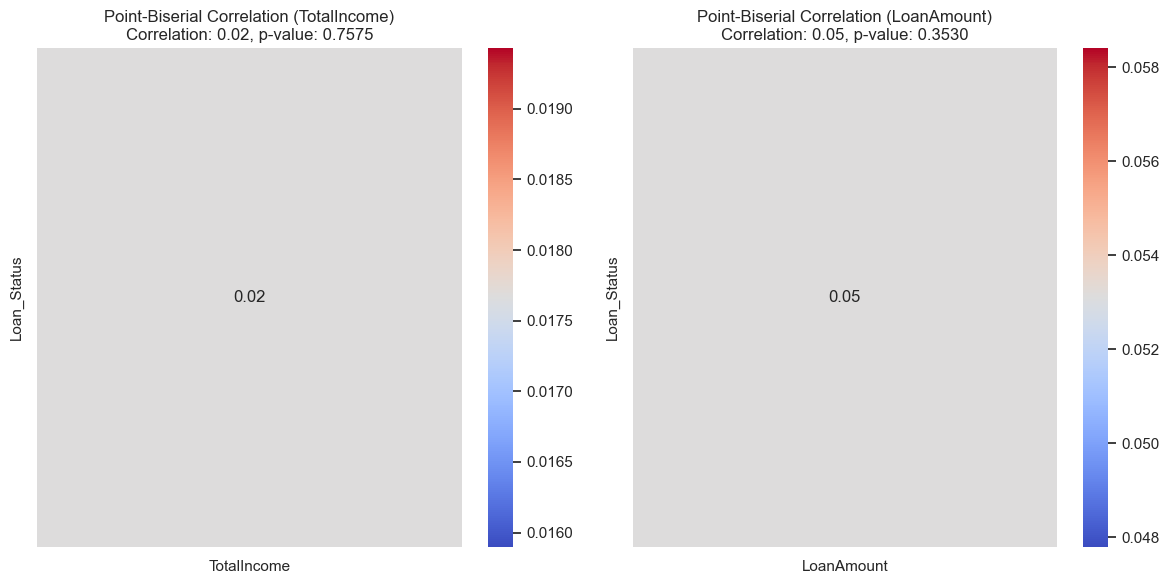

In [48]:
from scipy.stats import pointbiserialr

# Compute point-biserial correlation coefficient and p-value for TotalIncome
corr_total_income, p_value_total_income = pointbiserialr(jointdf['TotalIncome'], jointdf['Loan_Status'])

# Compute point-biserial correlation coefficient and p-value for LoanAmount
corr_loan_amount, p_value_loan_amount = pointbiserialr(jointdf['LoanAmount'], jointdf['Loan_Status'])

# Create subplots for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for TotalIncome
sb.heatmap(correlation_matrix_total_income, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title(f"Point-Biserial Correlation (TotalIncome)\nCorrelation: {corr_total_income:.2f}, p-value: {p_value_total_income:.4f}")

# Heatmap for LoanAmount
sb.heatmap(correlation_matrix_loan_amount, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title(f"Point-Biserial Correlation (LoanAmount)\nCorrelation: {corr_loan_amount:.2f}, p-value: {p_value_loan_amount:.4f}")

plt.tight_layout()
plt.show()

In [49]:
print("Point-Biserial Correlation Coefficient (Total Income):", corr_total_income)
print("P-value:", p_value_total_income)

print("Point-Biserial Correlation Coefficient (Loan Amount):", corr_loan_amount)
print("P-value:", p_value_loan_amount)



Point-Biserial Correlation Coefficient (Total Income): 0.01766524562618873
P-value: 0.7574833068525589
Point-Biserial Correlation Coefficient (Loan Amount): 0.053103644903444526
P-value: 0.35297651130416335


As the correlation coefficient for both Total Income and Loan Amount is small. We show that there is little to no relation between Total Income and Loan Amount vs Loan Status.

### Credit History, Marital Status, No. of Dependents, Education Level, Gender, Property Area vs Loan Status
Using Cramer's V
- Cramér's V value ranges from 0 to 1, with 0 indicating no association and 1 indicating a strong association between the two categorical variables.

In [51]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [52]:
jointdf2 = pd.DataFrame(loandata[["Credit_History","Married","Dependents","Education","Property_Area","Gender","Loan_Status"]])
jointdf2.describe()

,Credit_History,Married,Dependents,Education,Property_Area,Gender,Loan_Status
count,308,308,308,308,308,308,308
unique,2,2,4,2,3,2,2
top,Y,Yes,0,Graduate,Semiurban,Male,Y
freq,263,185,194,229,123,245,219


In [53]:
confusion_matrix_credithistory = pd.crosstab(jointdf2['Loan_Status'], jointdf2['Credit_History'])
confusion_matrix_married = pd.crosstab(jointdf2['Loan_Status'], jointdf2['Married'])
confusion_matrix_dependents = pd.crosstab(jointdf2['Loan_Status'], jointdf2['Dependents'])
confusion_matrix_education = pd.crosstab(jointdf2['Loan_Status'], jointdf2['Education'])
confusion_matrix_propertyarea = pd.crosstab(jointdf2['Loan_Status'], jointdf2['Property_Area'])
confusion_matrix_gender = pd.crosstab(jointdf2['Loan_Status'], jointdf2['Gender'])



In [54]:
cramers_v_value_credithistory = cramers_v(confusion_matrix_credithistory)
print("Cramér's V value (Credit History):", cramers_v_value_credithistory)

cramers_v_value_married = cramers_v(confusion_matrix_married)
print("Cramér's V value (Marital Status):", cramers_v_value_married)

cramers_v_value_dependents = cramers_v(confusion_matrix_dependents)
print("Cramér's V value (No. Of Dependents):", cramers_v_value_dependents)

cramers_v_value_education = cramers_v(confusion_matrix_education)
print("Cramér's V value (Education Level):", cramers_v_value_education)

cramers_v_value_propertyarea = cramers_v(confusion_matrix_propertyarea)
print("Cramér's V value (Property Area):", cramers_v_value_propertyarea)

cramers_v_value_gender = cramers_v(confusion_matrix_gender)
print("Cramér's V value (Gender):", cramers_v_value_gender)

Cramér's V value (Credit History): 0.5760033155054942
Cramér's V value (Marital Status): 0.10159323837572513
Cramér's V value (No. Of Dependents): 0.0
Cramér's V value (Education Level): 0.0
Cramér's V value (Property Area): 0.1705075667830605
Cramér's V value (Gender): 0.05068638202172745


# Conclusion

Based on the Cramér's V value, we can conclude that Credit History plays an important role in determining the loan status of the applicant as it has the highers value of 0.576. 